# Homework 1

## Part 1

### Use Data Generation script to create sample data for using clustering algorithms to determine clusters for both examples 

*Generate first dataset*

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [2]:
Points0 = create_dataset_00()

/Users/anran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: covariance is not positive-semidefinite.


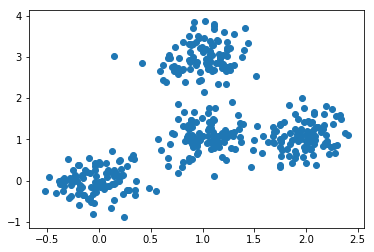

In [3]:
plt.scatter(Points0[:,0], Points0[:,1])
plt.show()

*Generate second dataset*

In [4]:
from random import random
def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [5]:
Points1 = create_dataset_01()

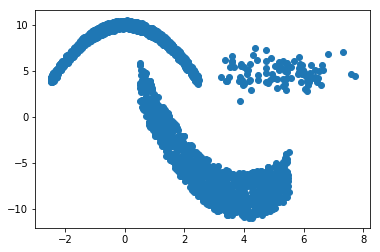

In [6]:
plt.scatter(Points1[:,0], Points1[:,1])
plt.show()

- **KMeans**

In [7]:
from sklearn.cluster import KMeans, DBSCAN

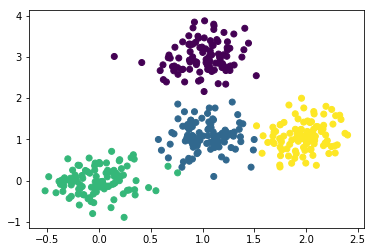

In [8]:
kmeans_model0 = KMeans(n_clusters=4)
y_km0 = kmeans_model0.fit_predict(Points0)

plt.scatter(Points0[:, 0], Points0[:, 1], c=y_km0)
plt.show()

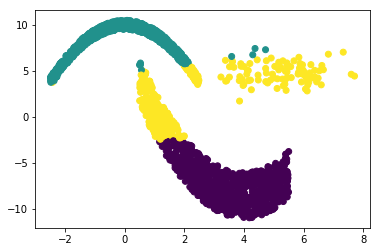

In [9]:
kmeans_model1 = KMeans(n_clusters=3)
y_km1 = kmeans_model1.fit_predict(Points1)

plt.scatter(Points1[:, 0], Points1[:, 1], c=y_km1)
plt.show()

- **DBSCAN**

In [10]:
db_model0 = DBSCAN().fit(Points0)

core_samples_mask0 = np.zeros_like(db_model0.labels_, dtype=bool)
core_samples_mask0[db_model0.core_sample_indices_] = True
labels = db_model0.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


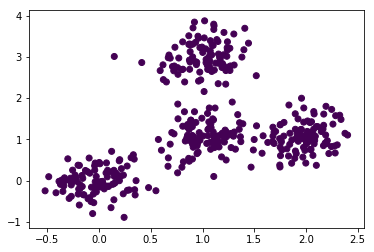

In [11]:
plt.scatter(Points0[:, 0], Points0[:, 1], c=db_model0.labels_)
plt.show()

In [12]:
db_model1 = DBSCAN().fit(Points1)

core_samples_mask1 = np.zeros_like(db_model1.labels_, dtype=bool)
core_samples_mask1[db_model1.core_sample_indices_] = True
labels = db_model1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 22


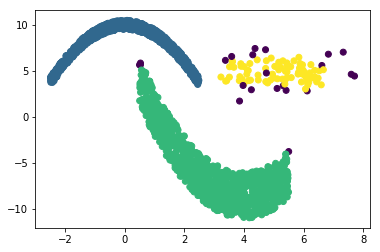

In [13]:
plt.scatter(Points1[:, 0], Points1[:, 1], c=db_model1.labels_)
plt.show()

- **MeanShift**

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

bandwidth0 = estimate_bandwidth(Points0, quantile=0.2, n_samples=200)

ms0 = MeanShift(bandwidth=bandwidth0, bin_seeding=True)
ms0.fit(Points0)
labels0 = ms0.labels_
cluster_centers0 = ms0.cluster_centers_

labels_unique0 = np.unique(labels0)
n_clusters_ = len(labels_unique0)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


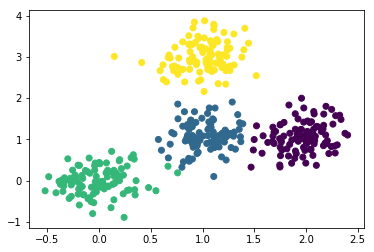

In [15]:
plt.scatter(Points0[:, 0], Points0[:, 1], c=ms0.labels_)
plt.show()

In [16]:
bandwidth1 = estimate_bandwidth(Points1, quantile=0.2, n_samples=500)

ms1 = MeanShift(bandwidth=bandwidth1, bin_seeding=True)
ms1.fit(Points1)
labels1 = ms1.labels_
cluster_centers1 = ms1.cluster_centers_

labels_unique1 = np.unique(labels1)
n_clusters_ = len(labels_unique1)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


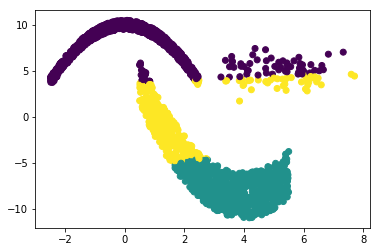

In [17]:
plt.scatter(Points1[:, 0], Points1[:, 1], c=ms1.labels_)
plt.show()

### Train a TensorFlow classifier

*Data creation function*

In [18]:
def create_dataset_tf(n):
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                n
            )
        )
    Points = np.vstack(Points)
    return Points

*Create dataset*

In [19]:
points_tf = create_dataset_tf(600)

/Users/anran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


*Plot dataset*

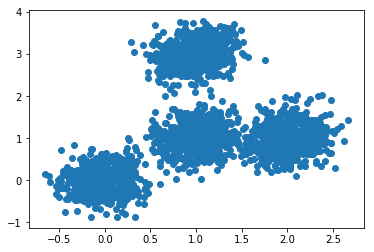

In [20]:
plt.scatter(points_tf[:,0], points_tf[:,1])
plt.show()

*Use KMeans to cluster the dataset*

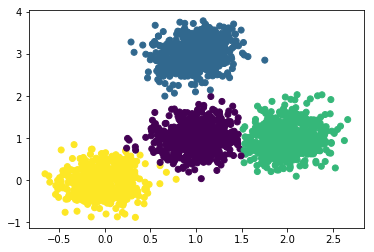

In [21]:
km_model = KMeans(n_clusters=4)
y_km_tf = km_model.fit_predict(points_tf)

plt.scatter(points_tf[:, 0], points_tf[:, 1], c=y_km_tf)
plt.show()

*Random select 2000 points and corresponding labels as training dataset from 2400 whole dataset, another 400 data as test dataset*

In [22]:
train_index = np.random.choice(points_tf.shape[0], 2000, replace = False)
test_index = np.arange(points_tf.shape[0])
test_index = np.delete(test_index, train_index)

train_index.sort()
test_index.sort()

train_points = points_tf[train_index]
train_labels = y_km_tf[train_index]
test_points = points_tf[test_index]
test_labels = y_km_tf[test_index]

In [23]:
import tensorflow as tf
import tensorflow.keras as keras

/Users/anran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/anran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

*Set up the layers*

In [25]:
model = tf.keras.Sequential([
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

*Compile the model*

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*Train the model*

In [27]:
model.fit(train_points, train_labels, epochs = 15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2000 samples
Epoch 1/15
2000/2000 [==============================] - 0s 159us/sample - loss: 1.5215 - accuracy: 0.2085
Epoch 2/15
2000/2000 [==============================] - 0s 29us/sample - loss: 1.1431 - accuracy: 0.5295
Epoch 3/15
2000/2000 [==============================] - 0s 30us/sample - loss: 0.9411 - accuracy: 0.7415
Epoch 4/15
2000/2000 [==============================] - 0s 29us/sample - loss: 0.7584 - accuracy: 0.8210
Epoch 5/15
2000/2000 [==============================] - 0s 27us/sample - loss: 0.5943 - accuracy: 0.8790
Epoch 6/15
2000/2000 [==============================] - 0s 24us/sample - loss: 0.4588 - accuracy: 0.9160
Epoch 7/15
2000/2000 [==============================] - 0s 23us/sample - loss: 0.3547 - accuracy: 0.9450
Epoch 8/15
2000/2000 [==============================] - 0s 23us/sample - loss: 0.2788 - accuracy: 0.9640
Epoch 9/15
2000/2000 [=====================

*Evaluate the model*

In [38]:
test_loss, test_acc = model.evaluate(test_points, test_labels)
print('\nTest accuracy:', test_acc)

400/400 [==============================] - 0s 22us/sample - loss: 0.0598 - accuracy: 0.9975

Test accuracy: 0.9975


*Make predictions*

In [39]:
predictions = model.predict(test_points)

*Random select one prediction*

In [41]:
ran = np.random.randint(0, 400)
predictions[ran]

array([1.0083725e-02, 9.8991334e-01, 2.0199177e-06, 9.4122765e-07],
      dtype=float32)

In [42]:
np.argmax(predictions[ran])

1

*Compare with true label*

In [43]:
test_labels[ran]

1